<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

# Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.graph_objects as go
import imageio as iio
pio.renderers.default = "png"
 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from shapely.geometry import MultiPoint

# Loading Dataset

In [2]:
taxi_zone = pd.read_csv("Data/taxi-zone-lookup.csv")

uber_raw = [pd.read_csv(f'data/uber-raw-data-{e}.csv') for e in ['apr14','may14','jun14','jul14','aug14','sep14']]
uber_raw = pd.concat(uber_raw)

In [3]:
uber_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


In [4]:
uber_raw.describe(include='all')

,Date/Time,Lat,Lon,Base
count,4534327,4.534327e+06,4.534327e+06,4534327
unique,260093,NaN,NaN,5
top,4/7/2014 20:21:00,NaN,NaN,B02617
freq,97,NaN,NaN,1458853
mean,NaN,4.073926e+01,-7.397302e+01,NaN
std,NaN,3.994991e-02,5.726670e-02,NaN
min,NaN,3.965690e+01,-7.492900e+01,NaN
25%,NaN,4.072110e+01,-7.399650e+01,NaN
50%,NaN,4.074220e+01,-7.398340e+01,NaN
75%,NaN,4.076100e+01,-7.396530e+01,NaN


## Let's decompose our dates

In [6]:
uber_raw['Date/Time'] = pd.to_datetime(uber_raw['Date/Time'])
uber_raw['hour'] = uber_raw['Date/Time'].dt.hour
uber_raw['month'] = uber_raw['Date/Time'].dt.month
uber_raw['day'] = uber_raw['Date/Time'].dt.day
uber_raw['dayofweek'] = uber_raw['Date/Time'].dt.day_of_week
uber_raw['day_name'] = uber_raw['Date/Time'].dt.day_name()

# What is the Base feature ?

C:\Users\Hicham\AppData\Local\Temp\ipykernel_17192\3616244262.py:2: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



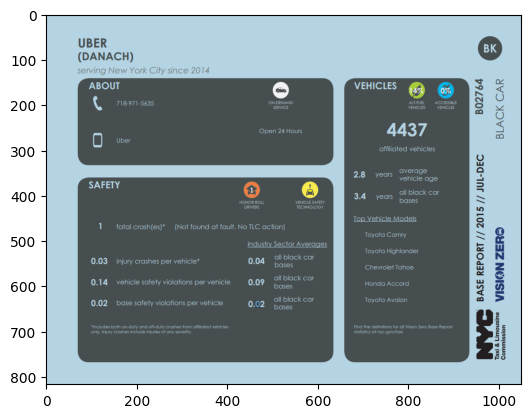

In [16]:
# read an image
img = iio.imread("Data/B02764.png")
plt.imshow(img)

# 🔍 EDA - Exploratory Data Analysis 🔎

First we are going to clean our dataset, by removing no relevant and unused features for our analysis.

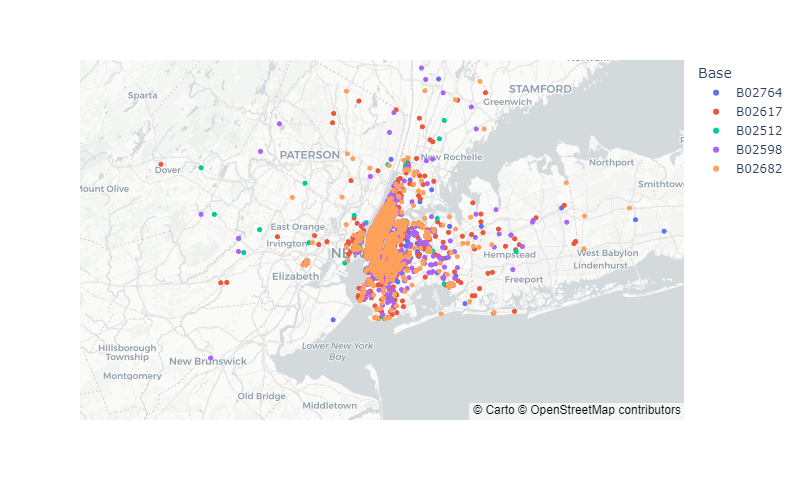

In [7]:
sample = uber_raw.sample(n=10000, weights='hour', random_state=1)
fig = px.scatter_mapbox(sample,lat='Lat',lon='Lon',color='Base',zoom=8,mapbox_style="carto-positron",width=800)
fig.show()


Figure - Number of Uber rides per hour and per day of week 




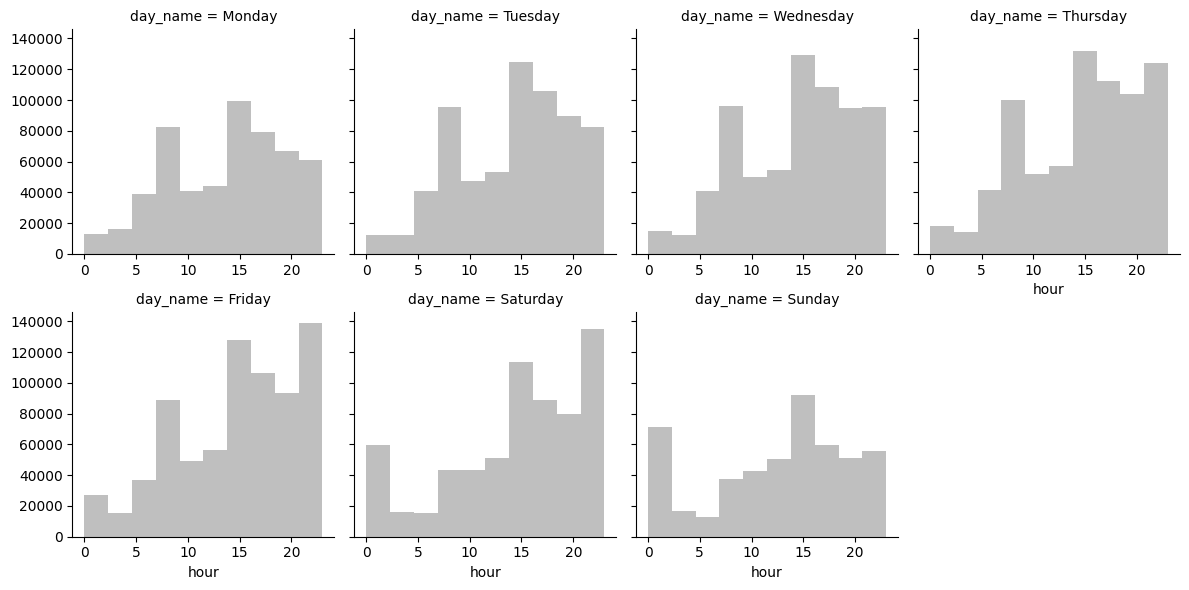

In [8]:

print("""
Figure - Number of Uber rides per hour and per day of week \n
""")
fig1 = sb.FacetGrid( data= uber_raw.sort_values(by = ["dayofweek"], ascending=True), col="day_name", col_wrap=4, sharex=False)
fig1.map(plt.hist, "hour", alpha=.5, color="gray")


Figure - Number of Uber rides per day of week




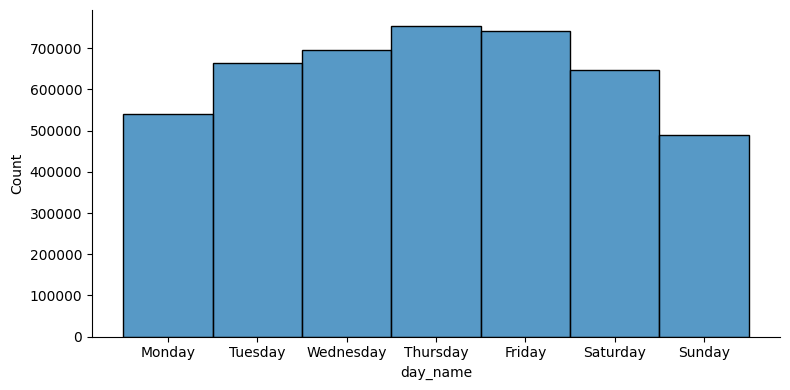

In [9]:
print("""
Figure - Number of Uber rides per day of week\n
""")
fig = sb.displot(data=uber_raw.sort_values(by = ["dayofweek"]), x="day_name",
                 discrete=True,
                 height=4, aspect=2)



Figure - Number of Uber rides per hour




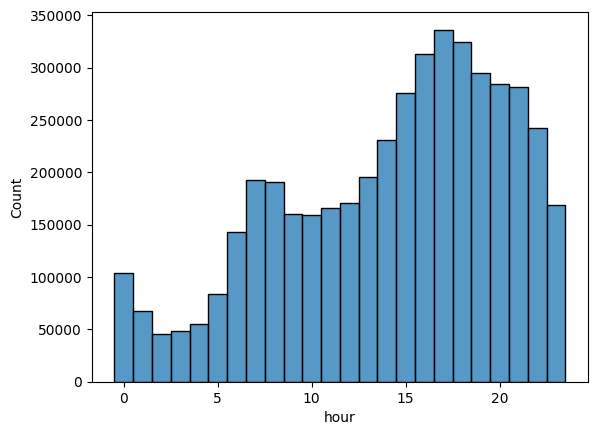

In [10]:

print("""
Figure - Number of Uber rides per hour\n
""")
fig = sb.histplot(data=uber_raw, x="hour",
                  discrete=True)


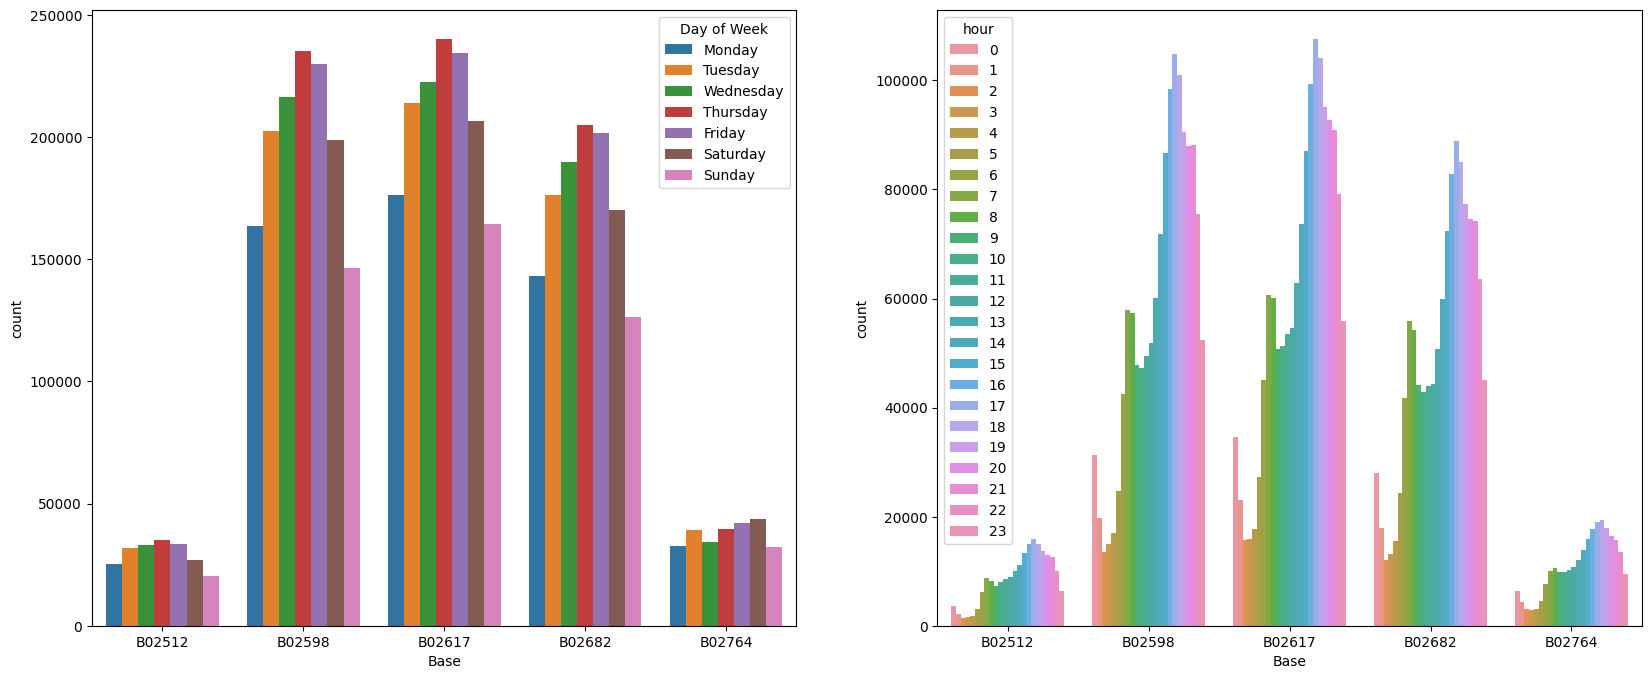

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
sb.countplot(data=uber_raw,x='Base',hue='dayofweek', ax=ax1)
ax1.legend(title='Day of Week', labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sb.countplot(data=uber_raw,x='Base',hue='hour', ax=ax2)
plt.show()

# Clustering

## Proprocessing

In [12]:
scaler = StandardScaler()
features = ['Lat','Lon']
X = scaler.fit_transform(uber_raw[features])

sample_x = uber_raw.sample(n=int((len(uber_raw)/20)), weights='hour', random_state=1)
sample_X = scaler.fit_transform(sample_x[features])
# creating a sample to reduce computing time

## DBSCAN model

In [13]:
dbscan = DBSCAN(eps=0.1,metric='manhattan',min_samples=1000)
dbscan.fit(sample_X)
np.unique(dbscan.labels_,return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([ 44276, 166887,   4615,   5494,   4441,   1003], dtype=int64))

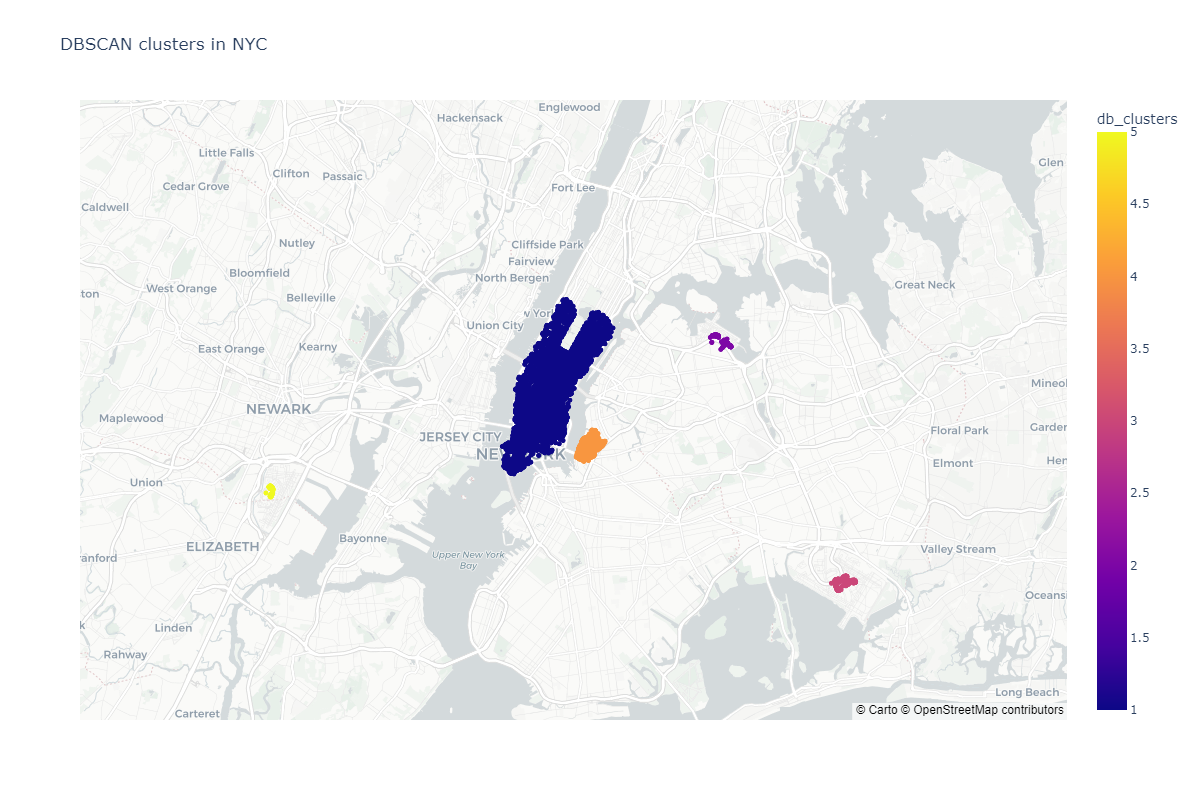

In [14]:
# Ignoring cluster -1 : outliers
sample_x['db_clusters'] = dbscan.labels_
sample_x['db_clusters'] += 1
db_sample = sample_x.sample(n=10000, weights='db_clusters', random_state=1)

fig = px.scatter_mapbox(db_sample,lat='Lat',lon='Lon',color='db_clusters',
                        zoom=10,mapbox_style="carto-positron",width=1200,height=800, 
                        title='DBSCAN clusters in NYC')
fig.show()